In [485]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [487]:
#dataset pour classifier les plantes comme malades ou non
data=pd.read_csv(r"C:\Users\trabe\Desktop\plant_disease_dataset.csv")
data

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


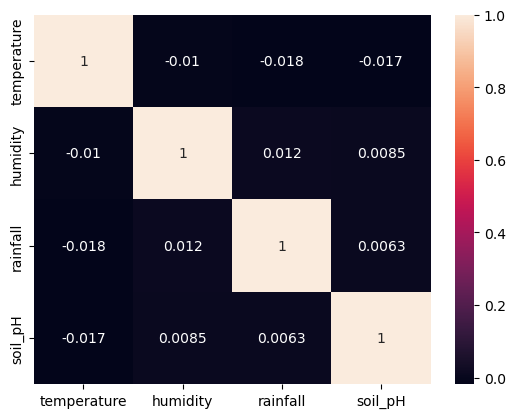

In [489]:
#coefficient de correlation pour voir si les variables sont fortement corrolées ou non 
sns.heatmap(data[['temperature','humidity','rainfall','soil_pH']].corr(),annot=True)
plt.show()

In [490]:
#matrice des features 
X=data.drop('disease_present',axis=1).values
#matrice de label
Y=data['disease_present'].values

In [493]:
Y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [495]:
X

array([[27.48357077, 33.2150527 ,  0.57275778,  4.9758751 ],
       [24.30867849, 36.94500537, 42.52234633,  8.16526563],
       [28.23844269, 34.02618939, 16.09530324,  6.31673402],
       ...,
       [21.47341638, 81.89176985, 13.4268688 ,  7.10158325],
       [27.47882787, 88.56764865,  9.71965871,  7.73262046],
       [28.22194227, 71.90040098,  4.88639063,  4.3835364 ]])

In [497]:
#rendre Y en matrice (m,1)
Y=Y.reshape(10000,1)
Y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [499]:
#separation des donnees pour apprentissage et test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [501]:
#generer notre model 
def model_reg(X,W,b):
    return X.dot(W)+b

In [503]:
#generer la matrice sigmoide 
def sigmoide(X,W,b):
    return 1/(1+np.exp(-1*model_reg(X,W,b)))

In [505]:
#fonction cout 
def logloss(A,Y):
    ep=1e-15
    m=A.shape[0]
    A=np.clip(A,ep,1-ep) #on cas on a A=0 ou 1 on va avoir une valeur inf dou on va ajouter ou resuiser un ep de notre A dans cette cas
    return -1/m * np.sum( Y*np.log(A) + (1-Y)*np.log(1-A) )

In [507]:
# fonction descente de gradient
def desc_grad(W,X,Y,b,alpha,nb):
    m=X.shape[0]
    cout=np.zeros((nb,))
    for i in range (nb):
        A=sigmoide(X,W,b)
        cout[i]=logloss(A,Y)
        W=W - ((alpha/m) * (X.T).dot(A-Y))
        b=b - ((alpha/m) * np.sum(A-Y))
    return W,b,cout

In [593]:
def predict(x_test,W,b):
    m=x_test.shape[0]
    predict=np.zeros((m,1))
    A=sigmoide(x_test,W,b)
    for i in range(m):
        if (A[i,0]>=0.5):
            predict[i]=1
    return predict,A

In [511]:
#generer notre vecteur w contient 4 valeur et un scalaire b 
W=np.random.randn(4,1)
b=np.random.randn()
print(W,b)

[[-0.77966846]
 [ 0.45593917]
 [ 0.70640146]
 [-0.35706858]] -0.8425008011701728


In [517]:
#vecteur w et b apres apprentissage 
W,b,cout=desc_grad(W,x_train,y_train,b,0.001,1000)
print(W,b)

[[ 0.01597118]
 [ 0.02822682]
 [ 0.05718844]
 [-0.52295022]] -0.8733228600672092


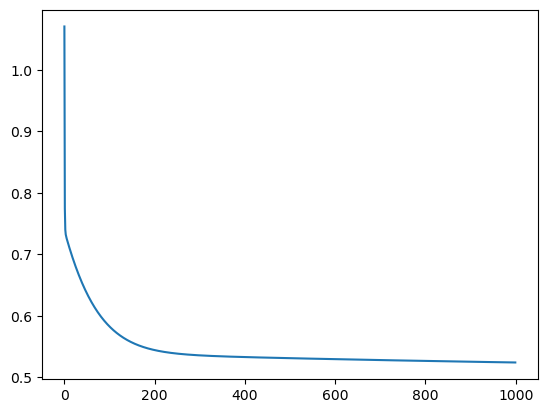

In [519]:
#visualiser la courbe du logloss
plt.plot(cout)
plt.show()

In [595]:
#valeurs de classification et la probabilité d'appartenir a la classe 1
y_pred,prob=predict(x_test,W,b)

In [597]:
print(prob)

[[0.33423515]
 [0.04187113]
 [0.08765775]
 ...
 [0.26562915]
 [0.65739568]
 [0.07787822]]


In [599]:
print(y_pred)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [601]:
#calcul accuracy de model 
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.7416666666666667

### Logistic_Regression (sklearn)

In [569]:
from sklearn import linear_model
mod=linear_model.LogisticRegression()
mod.fit(x_train,y_train)
print(mod.predict(x_test))
print(mod.predict_proba(x_test))
#chaque ligne contient la probabilité de classe 0 a gauche et a droite probabilité de classe 1

[0 0 0 ... 0 0 0]
[[0.59483494 0.40516506]
 [0.91573306 0.08426694]
 [0.89397972 0.10602028]
 ...
 [0.72957309 0.27042691]
 [0.52714669 0.47285331]
 [0.83477834 0.16522166]]


C:\Users\trabe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [571]:
print(y_test)

[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [573]:
accuracy_score(y_test,mod.predict(x_test))

0.7663333333333333